## A01753176 Gilberto André García Gaytán

## Análisis de Series Temporales de Productos de Amazon con ARIMA
Este notebook presenta un análisis de la serie temporal del número de lanzamientos de productos de Amazon utilizando un modelo ARIMA. El análisis abarca desde la preparación de los datos hasta la evaluación e interpretación del modelo, incluyendo la aplicación de las predicciones y las propuestas de solución.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


### Carga de Datos y Preparación de la Serie Temporal
Se cargan los datos de los productos de Amazon y se prepara la serie temporal que representa el número de lanzamientos de productos por año.

In [2]:
# Cargar los datos
file_path = 'Amazon Products.csv'
data = pd.read_csv(file_path)

# Crear la serie temporal del número de lanzamientos por año
product_launches_per_year = data['Launch Year'].value_counts().sort_index()

# Mostrar las primeras filas de la serie temporal
product_launches_per_year.head()

Launch Year
1980    1
1990    1
1994    1
1995    1
1999    1
Name: count, dtype: int64

### División de Datos y Ajuste del Modelo ARIMA
Se dividen los datos en un conjunto de entrenamiento y otro de prueba, y ajustamos un modelo ARIMA(1,1,1).

In [3]:
# Dividir la serie en conjunto de entrenamiento y de prueba
train_size = int(len(product_launches_per_year) * 0.8)
train, test = product_launches_per_year[0:train_size], product_launches_per_year[train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index 

### Evaluación del Modelo
Se evalua el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

In [4]:
# Evaluar el modelo
mse = mean_squared_error(test, predictions)
rmse = mse**0.5

# Resultados
mse, rmse, predictions

(1.0044845643963878,
 1.002239773904622,
 16    2.118377
 17    1.980610
 18    1.997581
 19    1.995490
 20    1.995748
 Name: predicted_mean, dtype: float64)

### Interpretación y Aplicación
Se interpretán los resultados en el contexto del problema y se proponen soluciones basadas en las predicciones del modelo ARIMA.

Dado que se está modelando el número de lanzamientos de productos de Amazon por año, estas predicciones pueden ser utilizadas para anticipar la actividad futura de lanzamientos de productos. Un valor cercano a 2 sugiere que Amazon podría lanzar alrededor de dos productos en cada uno de estos años futuros.

**Planificación de Recursos**: Estas predicciones pueden ayudar a Amazon a planificar recursos y estrategias de marketing en función del número esperado de lanzamientos de productos.

**Estrategias de Inversión**: Para los inversores y analistas, estas predicciones ofrecen una visión de la actividad de lanzamiento de productos de Amazon, que puede ser un indicador del dinamismo y la innovación de la empresa.

La precisión de las predicciones depende de varios factores, como la naturaleza cambiante del mercado y las actividades internas de Amazon que no se reflejan en los datos de lanzamientos de productos. Por lo tanto, estas predicciones deben ser utilizadas como una guía y no como una certeza absoluta.

## Análisis Detallado de Series Temporales de Productos de Amazon con ARIMA
Este notebook presenta un análisis detallado de la serie temporal del número de lanzamientos de productos de Amazon utilizando un modelo ARIMA. Se incluye un análisis exploratorio más profundo, verificación de estacionariedad, determinación de parámetros del modelo, ajuste, validación, evaluación detallada del modelo y una interpretación contextualizada de los resultados.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### Carga de Datos y Análisis Exploratorio
Se cargan los datos de los productos de Amazon y realizamos un análisis exploratorio para entender mejor la serie temporal y cualquier patrón o anomalía en ella.

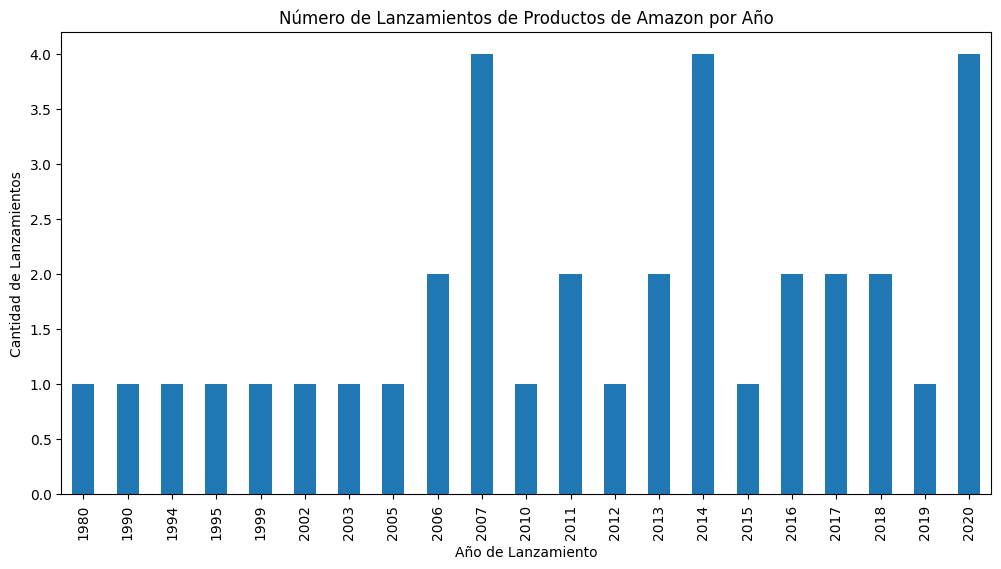

In [6]:
# Cargar los datos
file_path = 'Amazon Products.csv'
data = pd.read_csv(file_path)

# Crear la serie temporal del número de lanzamientos por año
product_launches_per_year = data['Launch Year'].value_counts().sort_index()

# Análisis exploratorio: Visualización de la serie temporal
plt.figure(figsize=(12, 6))
product_launches_per_year.plot(kind='bar')
plt.title('Número de Lanzamientos de Productos de Amazon por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Lanzamientos')
plt.show()

### Verificación de Estacionariedad
Se realiza la prueba de Dickey-Fuller aumentada para verificar si la serie temporal es estacionaria.

In [7]:
# Prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test = adfuller(product_launches_per_year)

# Resultados de la prueba
adf_result = {
    'Prueba Estadística': adf_test[0],
    'P-valor': adf_test[1],
    'Lags Utilizados': adf_test[2],
    'Número de Observaciones': adf_test[3],
    'Valores Críticos': adf_test[4]
}

adf_result

{'Prueba Estadística': -1.3229553244818946,
 'P-valor': 0.6186058940725851,
 'Lags Utilizados': 5,
 'Número de Observaciones': 15,
 'Valores Críticos': {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445}}

### Determinación de Parámetros de ARIMA
Se utilizan los gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) para determinar los parámetros óptimos para el modelo ARIMA.

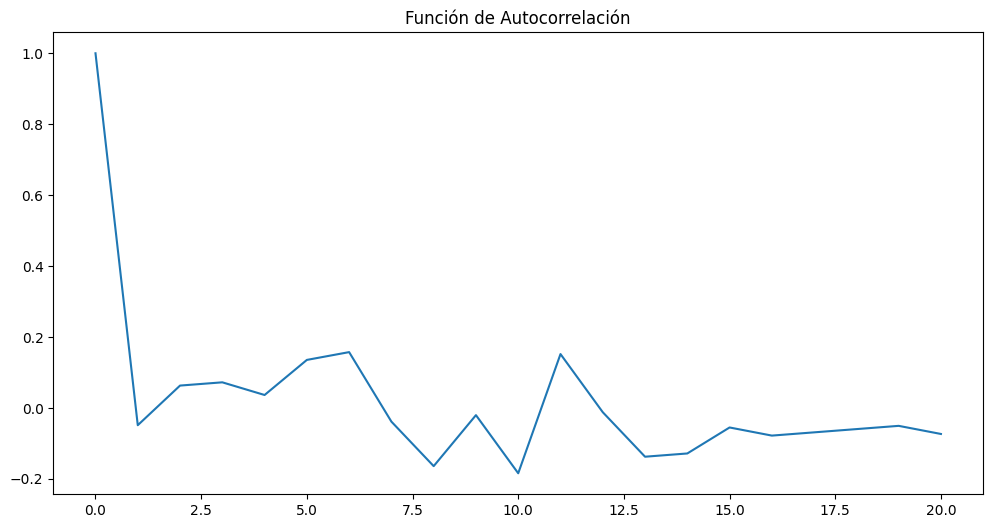

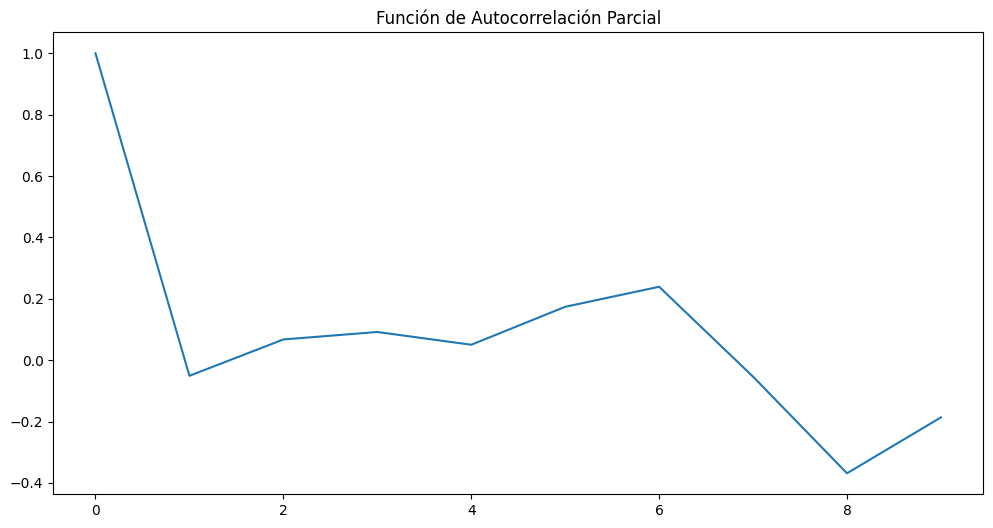

In [8]:
# Gráficos de ACF y PACF
lag_acf = acf(product_launches_per_year, nlags=20)
lag_pacf = pacf(product_launches_per_year, nlags=9)  # Reducir el número de rezagos

# Graficar ACF
plt.figure(figsize=(12, 6))
plt.plot(lag_acf)
plt.title('Función de Autocorrelación')

# Graficar PACF
plt.figure(figsize=(12, 6))
plt.plot(lag_pacf)
plt.title('Función de Autocorrelación Parcial')
plt.show()